# **Importing Libaries**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Performance measures
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# **Reading Dataset**

In [2]:
df = pd.read_csv("SPECT_train.csv")
df_test = pd.read_csv("SPECT_test.csv")

In [3]:
columns = ['OVERALL_DIAGNOSIS'] + ['F'+str(i) for i in range(1,23)]

In [4]:
df.columns = columns
df_test.columns = columns

In [5]:
df.head(5)

,OVERALL_DIAGNOSIS,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
1,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,...,1,1,0,1,0,0,0,1,0,1


In [6]:
df.shape

(79, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   OVERALL_DIAGNOSIS  79 non-null     int64
 1   F1                 79 non-null     int64
 2   F2                 79 non-null     int64
 3   F3                 79 non-null     int64
 4   F4                 79 non-null     int64
 5   F5                 79 non-null     int64
 6   F6                 79 non-null     int64
 7   F7                 79 non-null     int64
 8   F8                 79 non-null     int64
 9   F9                 79 non-null     int64
 10  F10                79 non-null     int64
 11  F11                79 non-null     int64
 12  F12                79 non-null     int64
 13  F13                79 non-null     int64
 14  F14                79 non-null     int64
 15  F15                79 non-null     int64
 16  F16                79 non-null     int64
 17  F17               

In [8]:
df['OVERALL_DIAGNOSIS'].value_counts()

0    40
1    39
Name: OVERALL_DIAGNOSIS, dtype: int64

In [9]:
test_features = df_test.iloc[:,1:]
test_target = df_test['OVERALL_DIAGNOSIS']

In [10]:
train_features = df.iloc[:,1:]
train_target = df['OVERALL_DIAGNOSIS']

In [11]:
train_features.shape

(79, 22)

In [12]:
train_target.shape

(79,)

# **Pair Plot**

In [13]:
# sns.pairplot(df, hue = 'OVERALL_DIAGNOSIS' )

<img src="PairPlot.png"/>

# **Feature Selection**

## Feature Importance

In [14]:
model = ExtraTreesClassifier()
model.fit(train_features,train_target)

ExtraTreesClassifier()

In [15]:
print(model.feature_importances_)

[0.02764638 0.02470665 0.02661091 0.03108946 0.03597202 0.01886724
 0.06465982 0.0977347  0.01965295 0.04181106 0.0804197  0.03482265
 0.12102665 0.02350685 0.01288782 0.08773943 0.04463786 0.01240989
 0.03738404 0.03019808 0.06267979 0.06353605]


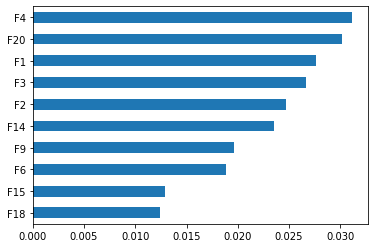

In [16]:
# plot graph of top 10 feature importances for better visualization
feature_importance = pd.Series(model.feature_importances_,index=train_features.columns)
feature_importance.nsmallest(10).plot(kind='barh')
plt.show()

## correlation Matrix with Heatmap

<AxesSubplot:>

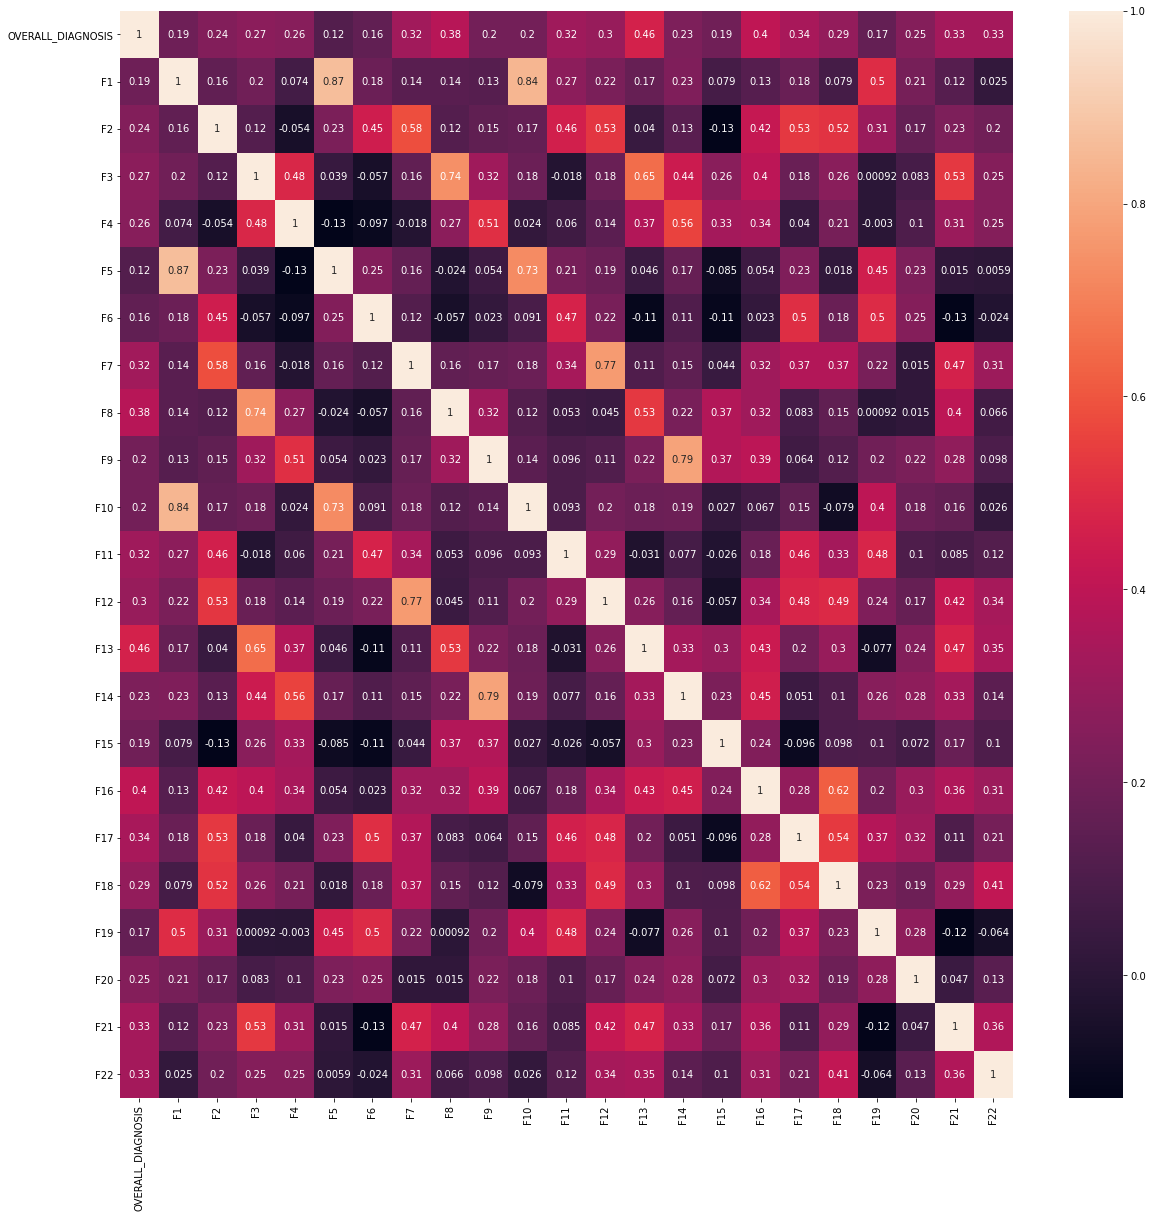

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True)

### **Not excluding any features because can't see a particular pattern. So, Didn't exclude any feature**

# **LogisticRegression**

In [18]:
lr = LogisticRegression(max_iter=1000,n_jobs=-1)

In [19]:
lr.fit(train_features,train_target)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [20]:
lr_predicted = lr.predict(test_features)

## Performance Measures

In [21]:
lr_ac = accuracy_score(test_target,lr_predicted)
lr_cr = classification_report(test_target,lr_predicted)
lr_cm = confusion_matrix(test_target,lr_predicted)

print(lr_ac)
print(lr_cr)
print(lr_cm)

0.7688172043010753
              precision    recall  f1-score   support

           0       0.23      0.80      0.36        15
           1       0.98      0.77      0.86       171

    accuracy                           0.77       186
   macro avg       0.60      0.78      0.61       186
weighted avg       0.92      0.77      0.82       186

[[ 12   3]
 [ 40 131]]


Text(51.0, 0.5, 'Truth')

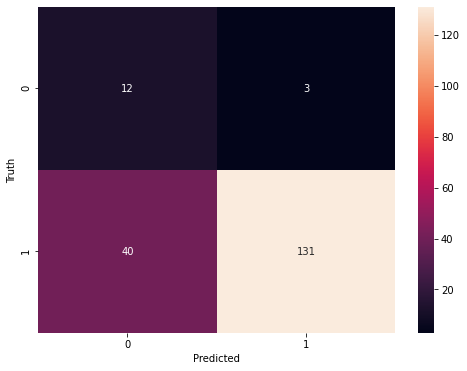

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(lr_cm, annot = True,fmt='.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **RandomForestClassifier**

In [23]:
rfc = RandomForestClassifier()

In [24]:
rfc.fit(train_features, train_target)

RandomForestClassifier()

In [25]:
rfc_predicted = rfc.predict(test_features)

## Performance Measures

In [26]:
rfc_ac = accuracy_score(test_target,rfc_predicted)
rfc_cr = classification_report(test_target,rfc_predicted)
rfc_cm = confusion_matrix(test_target,rfc_predicted)

print(rfc_ac)
print(rfc_cr)
print(rfc_cm)

0.7956989247311828
              precision    recall  f1-score   support

           0       0.26      0.80      0.39        15
           1       0.98      0.80      0.88       171

    accuracy                           0.80       186
   macro avg       0.62      0.80      0.63       186
weighted avg       0.92      0.80      0.84       186

[[ 12   3]
 [ 35 136]]


Text(51.0, 0.5, 'Truth')

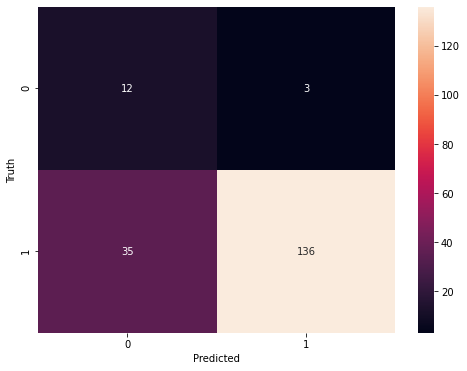

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(rfc_cm, annot = True,fmt='.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **Hyper Parameter Tuning**

### Randomized Search CV


In [28]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [29]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(train_features,train_target)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [30]:
best_random_grid = rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(max_depth=780, max_features='sqrt', min_samples_split=5,
                       n_estimators=600)

In [48]:
y_pred=best_random_grid.predict(test_features)

In [49]:
rfc_random_ac = accuracy_score(test_target,rfc_predicted)
rfc_random_cr = classification_report(test_target,rfc_predicted)
rfc_random_cm = confusion_matrix(test_target,rfc_predicted)

print(rfc_random_ac)
print(rfc_random_cr)
print(rfc_random_cm)

0.7956989247311828
              precision    recall  f1-score   support

           0       0.26      0.80      0.39        15
           1       0.98      0.80      0.88       171

    accuracy                           0.80       186
   macro avg       0.62      0.80      0.63       186
weighted avg       0.92      0.80      0.84       186

[[ 12   3]
 [ 35 136]]


Text(51.0, 0.5, 'Truth')

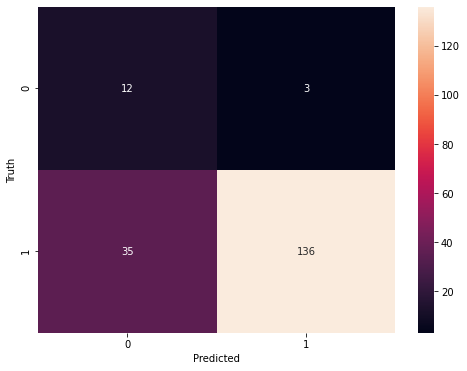

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(rfc_random_cm, annot = True,fmt='.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Linear Support Vector Classifier**

In [37]:
svc = LinearSVC(C=1.0)

In [38]:
svc.fit(train_features, train_target)

LinearSVC()

In [39]:
svc_predicted = svc.predict(test_features)

## Performance Measures

In [40]:
svc_ac = accuracy_score(test_target,svc_predicted)
svc_cr = classification_report(test_target,svc_predicted)
svc_cm = confusion_matrix(test_target,svc_predicted)

print(svc_ac)
print(svc_cr)
print(svc_cm)

0.7311827956989247
              precision    recall  f1-score   support

           0       0.21      0.87      0.34        15
           1       0.98      0.72      0.83       171

    accuracy                           0.73       186
   macro avg       0.60      0.79      0.59       186
weighted avg       0.92      0.73      0.79       186

[[ 13   2]
 [ 48 123]]


Text(51.0, 0.5, 'Truth')

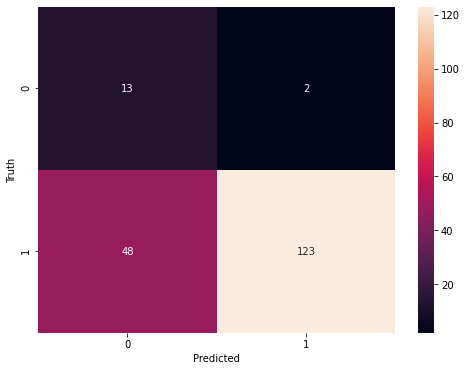

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(svc_cm, annot=True, fmt='.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **AdaBoostClassifier**

In [42]:
abc = AdaBoostClassifier(n_estimators=1000, random_state=0)

In [43]:
abc.fit(train_features, train_target)

AdaBoostClassifier(n_estimators=1000, random_state=0)

In [44]:
abc_predicted = abc.predict(test_features)

## Performance Measures

In [45]:
abc_ac = accuracy_score(test_target,abc_predicted)
abc_cr = classification_report(test_target,abc_predicted)
abc_cm = confusion_matrix(test_target,abc_predicted)

print(abc_ac)
print(abc_cr)
print(abc_cm)

0.7150537634408602
              precision    recall  f1-score   support

           0       0.19      0.80      0.31        15
           1       0.98      0.71      0.82       171

    accuracy                           0.72       186
   macro avg       0.58      0.75      0.57       186
weighted avg       0.91      0.72      0.78       186

[[ 12   3]
 [ 50 121]]


Text(51.0, 0.5, 'Truth')

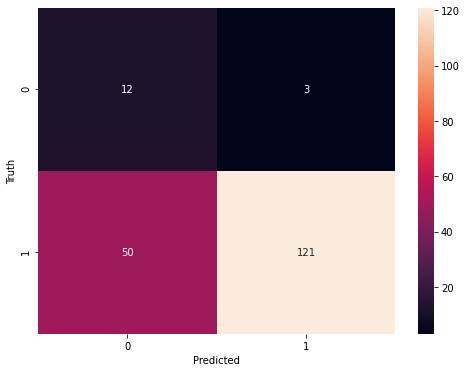

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(abc_cm, annot=True, fmt='.3g')
plt.xlabel('Predicted')
plt.ylabel('Truth')